#Data Loading and Inspection

In [83]:
### Load the required packages in the required format
import pandas as pd
import os
import numpy as np
from scipy.stats import ttest_ind
import warnings
import random
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
plt.style.use('ggplot')
import warnings
warnings.filterwarnings("ignore")

import nltk
nltk.download('punkt')
from wordcloud import WordCloud

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [16]:
p = 0.80  # to randomly select 80% of the rows

In [22]:
spotify_data = pd.read_csv('/content/spotify_dataset.csv', error_bad_lines=False, warn_bad_lines=False, skiprows=lambda i: i>0 and random.random() > p)
### Columns names were not very clean give them manual names
spotify_data.columns = ['user_id','artistname','trackname','playlistname']
spotify_data.head()

,user_id,artistname,trackname,playlistname
0,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello,(The Angels Wanna Wear My) Red Shoes,HARD ROCK 2010
1,9cc0cfd4d7d7885102480dd99e7a90d6,Tiffany Page,7 Years Too Late,HARD ROCK 2010
2,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello & The Attractions,Accidents Will Happen,HARD ROCK 2010
3,9cc0cfd4d7d7885102480dd99e7a90d6,Elvis Costello,Alison,HARD ROCK 2010
4,9cc0cfd4d7d7885102480dd99e7a90d6,Joe Echo,Beautiful,HARD ROCK 2010


In [23]:
spotify_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712422 entries, 0 to 712421
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       712422 non-null  object
 1   artistname    710892 non-null  object
 2   trackname     712415 non-null  object
 3   playlistname  712388 non-null  object
dtypes: object(4)
memory usage: 21.7+ MB


In [24]:
spotify_data.describe(include ='object')

,user_id,artistname,trackname,playlistname
count,712422,710892,712415,712388
unique,1283,55174,294933,14914
top,61baddf7207fea410abdc56e680fa869,Johnny Cash,Intro,Starred
freq,15118,2670,379,65719


In [25]:
print ("The number of rows in the datasets are as follows :",spotify_data.shape[0])

The number of rows in the datasets are as follows : 712422


In [26]:
print (" The columns in the data are as follows :",spotify_data.columns)

 The columns in the data are as follows : Index(['user_id', 'artistname', 'trackname', 'playlistname'], dtype='object')


#Data Cleaning
* Check Missing values
* Check Duplicates
* Check data typ
* Check the number of unique values of each column
* Check statistics of data set
* Check various categories present in the different categorical column

##Handle missing values

In [27]:
spotify_data.isnull().sum()

user_id            0
artistname      1530
trackname          7
playlistname      34
dtype: int64

Fill missing values with a specific value, such as "Unknown" or "Not available"

In [28]:
spotify_data['artistname'].fillna("Unknown", inplace=True)
spotify_data['trackname'].fillna("Not available", inplace=True)
spotify_data['playlistname'].fillna("Unknown Playlist", inplace=True)

In [29]:
print("Checking for missing values after handling:")
print(spotify_data.isnull().sum())

Checking for missing values after handling:
user_id         0
artistname      0
trackname       0
playlistname    0
dtype: int64


##Checking duplicates

In [30]:
spotify_data.duplicated().sum()

0

##Handling outliers

In [31]:
object_column = "artistname"

In [32]:
# Remove Rows with Inconsistent or Invalid Entries
# For example, we may find variations of the same artist name like "Coldplay," "ColdPlay," or "COLDPLAY."
# We can standardize the artist names to a common format, e.g., converting all to uppercase.
spotify_data[object_column] = spotify_data[object_column].str.upper()

In [33]:
print("Updated 'artistname' column:")
print(spotify_data[object_column].value_counts())

Updated 'artistname' column:
JOHNNY CASH                                                                                                                                                                                                                                                2670
COLDPLAY                                                                                                                                                                                                                                                   2355
THE ROLLING STONES                                                                                                                                                                                                                                         2231
DAFT PUNK                                                                                                                                                                                                  

In [34]:
spotify_data['trackname'] = spotify_data['trackname'].str.upper()
print("Updated 'artistname' column:")
print(spotify_data['trackname'].value_counts())

Updated 'artistname' column:
INTRO                                    379
HOME                                     316
CLOSER                                   225
RADIOACTIVE                              223
WAKE ME UP                               203
                                        ... 
ELEANOR RIGBY (DUB)                        1
ATHLANTIS                                  1
FIRE AND HEIGHTS - LIVE ALBUM VERSION      1
GIVE YOUR LOVE                             1
GHOST!                                     1
Name: trackname, Length: 285004, dtype: int64


#Exploring Data

In [35]:
print("Categories in 'user_id' variable:     ",end=" " )
print(spotify_data['user_id'].unique())

print("Categories in 'artistname' variable:  ",end=" ")
print(spotify_data['artistname'].unique())

print("Categories in 'trackname' variable:",end=" " )
print(spotify_data['trackname'].unique())

print("Categories in 'playlistname' variable:     ",end=" " )
print(spotify_data['playlistname'].unique())

Categories in 'user_id' variable:      ['9cc0cfd4d7d7885102480dd99e7a90d6' '07f0fc3be95dcd878966b1f9572ff670'
 '944c80d26922ae634d6ce445b1fdff7f' ... '8b77b0d29d92d93eb1c0763f8833689c'
 'eb619429451636d2dbe0450efe740e8f' 'a2e41c974951777b15812b5aef185515']
Categories in 'artistname' variable:   ['ELVIS COSTELLO' 'TIFFANY PAGE' 'ELVIS COSTELLO & THE ATTRACTIONS' ...
 'ZACH BERKMAN' 'ERAN JAMES' 'ELDERBROOK']
Categories in 'trackname' variable: ['(THE ANGELS WANNA WEAR MY) RED SHOES' '7 YEARS TOO LATE'
 'ACCIDENTS WILL HAPPEN' ... 'ENCORE/CURTAINS DOWN' 'FINAL THOUGHT (SKIT)'
 'GHOST!']
Categories in 'playlistname' variable:      ['HARD ROCK 2010' 'IOW 2012' '2080' ... 'Witney Houston' 'Car' 'Lol']


Number of playlists per user

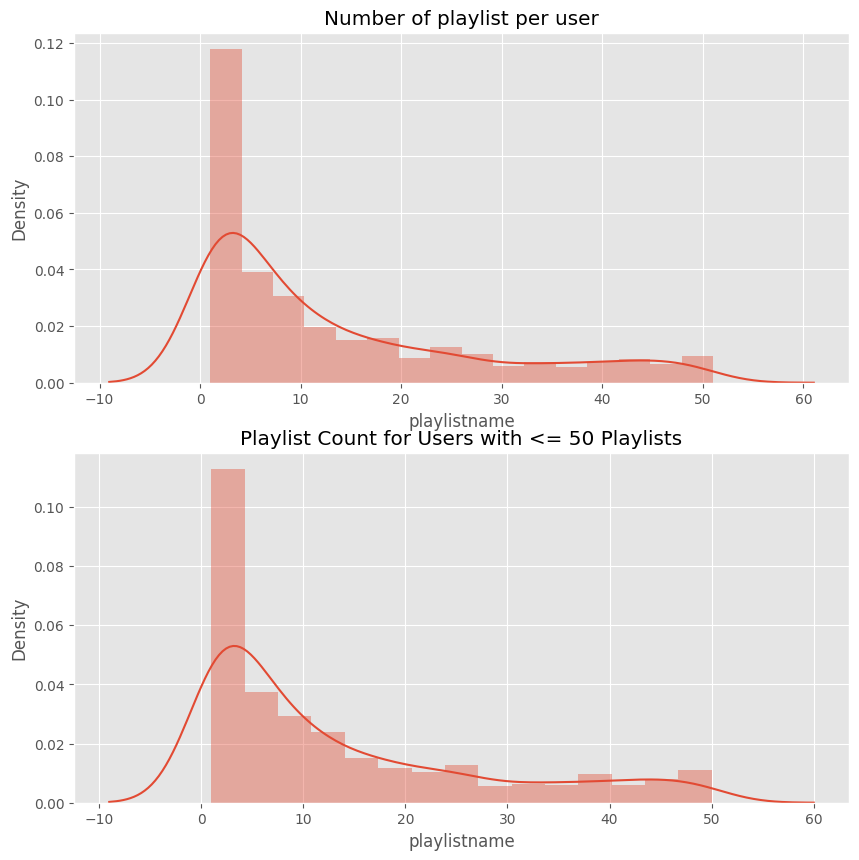

In [46]:
spotify_user_summary = spotify_data.groupby(['user_id'])["playlistname"].nunique().reset_index()
### Just for better visualisation remove very high playlist
fig, ax = plt.subplots(2, figsize=(10,10))
sns.distplot(spotify_user_summary['playlistname'], hist=True,ax = ax[0])
ax[0].set_title("Number of playlist per user")
spotify_user_summary = spotify_user_summary[spotify_user_summary['playlistname'] <= 50]
sns.distplot(spotify_user_summary['playlistname'], hist=True,ax=ax[1])
ax[1].set_title("Playlist Count for Users with <= 50 Playlists")
plt.show()

* The first subplot (top plot) shows the distribution of the number of playlists per user. The x-axis represents the count of playlists, and the y-axis represents the frequency of users with that number of playlists. From this subplot, you can observe the overall distribution of playlist counts among users. It provides insights into the engagement and activity levels of users on Spotify. You can see how many users have a small number of playlists, a moderate number of playlists, and those with a high number of playlists.

* The second subplot (bottom plot)  focuses on users with up to 50 playlists. By excluding very high playlist counts, this subplot allows you to gain a better understanding of the majority of users who have a more limited number of playlists. This can help you identify the typical user engagement patterns and playlists creation behavior for most users on Spotify.

The data is skewed toward smaller number of playlist.
Also We see a few users which may have very high number of playlists

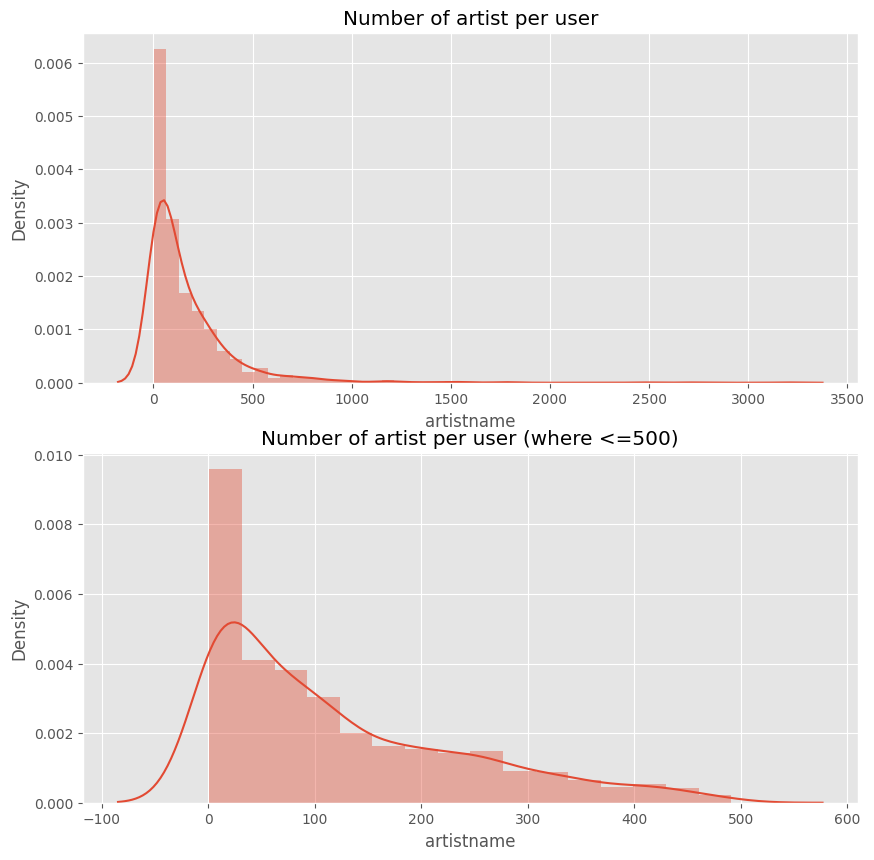

In [48]:
spotify_user_summary = spotify_data.groupby(['user_id'])["artistname"].nunique().reset_index()

fig, ax = plt.subplots(2, figsize=(10,10))
sns.distplot(spotify_user_summary["artistname"], hist=True,ax = ax[0])
ax[0].set_title("Number of artist per user")
spotify_user_summary = spotify_user_summary[spotify_user_summary["artistname"] <= 500]
sns.distplot(spotify_user_summary["artistname"], hist=True,ax=ax[1])
ax[1].set_title("Number of artist per user (where <=500)")
plt.show()

Most of the users listen to less number of artist as compared higher number of artist

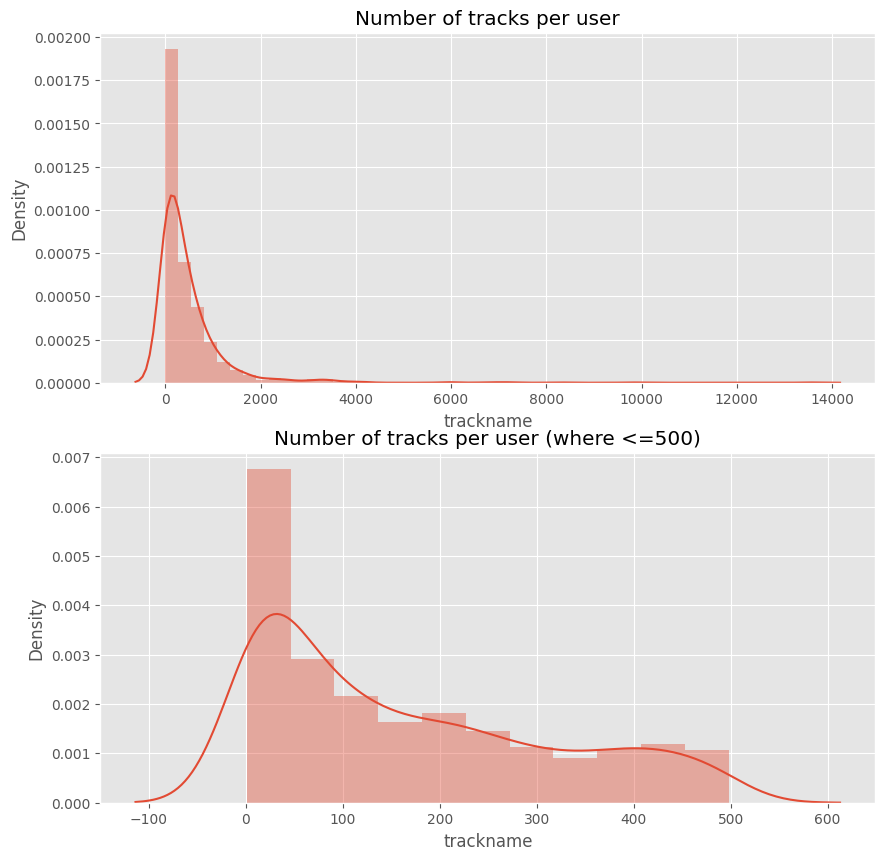

In [49]:
spotify_user_summary = spotify_data.groupby(['user_id'])["trackname"].nunique().reset_index()

### Just for better visualisation remove very high playlist
fig, ax = plt.subplots(2, figsize=(10,10))
sns.distplot(spotify_user_summary["trackname"], hist=True,ax = ax[0])
ax[0].set_title("Number of tracks per user")
spotify_user_summary = spotify_user_summary[spotify_user_summary["trackname"] <= 500]
sns.distplot(spotify_user_summary["trackname"], hist=True,ax=ax[1])
ax[1].set_title("Number of tracks per user (where <=500)")
plt.show()

Analyze the distribution of artists and tracks in the dataset to identify popular artists and tracks.


In [51]:
#Calculate the frequency of each artist and track
popular_artists = spotify_data['artistname'].value_counts()
popular_tracks = spotify_data['trackname'].value_counts()

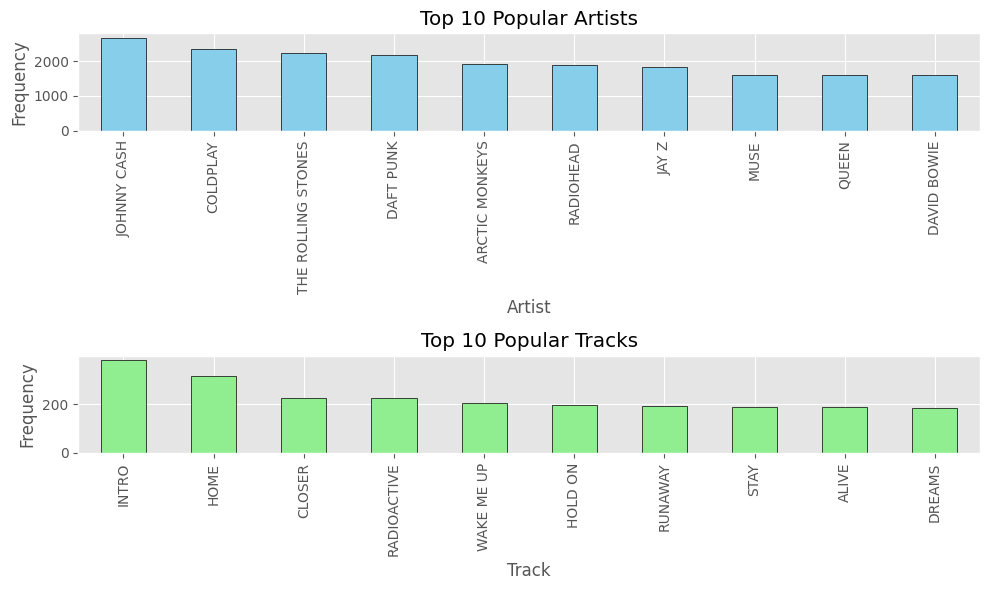

In [54]:
#Visualize the top N popular artists and tracks
top_n_artists = 10  # Replace with the desired number of top popular artists to visualize
top_n_tracks = 10   # Replace with the desired number of top popular tracks to visualize

plt.figure(figsize=(10, 6))

# Plot top N popular artists
plt.subplot(2, 1, 1)
popular_artists.head(top_n_artists).plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel("Artist")
plt.ylabel("Frequency")
plt.title(f"Top {top_n_artists} Popular Artists")
plt.grid(True)

# Plot top N popular tracks
plt.subplot(2, 1, 2)
popular_tracks.head(top_n_tracks).plot(kind='bar', color='lightgreen', edgecolor='black')
plt.xlabel("Track")
plt.ylabel("Frequency")
plt.title(f"Top {top_n_tracks} Popular Tracks")
plt.grid(True)

plt.tight_layout()
plt.show()

Conduct a frequency analysis of the playlist names to discover common themes or patterns


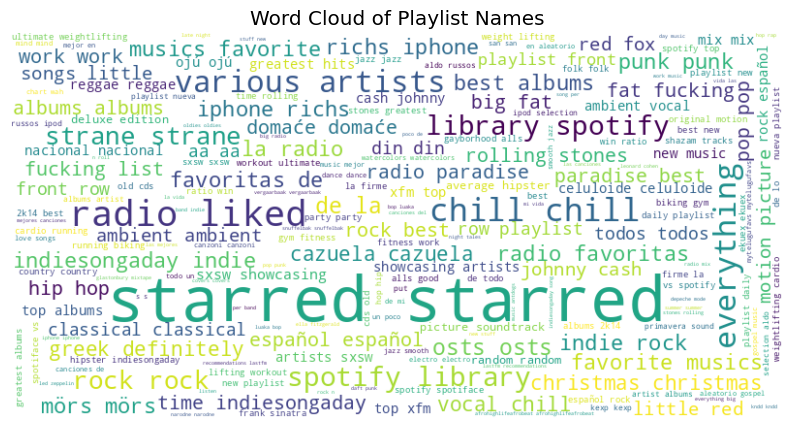

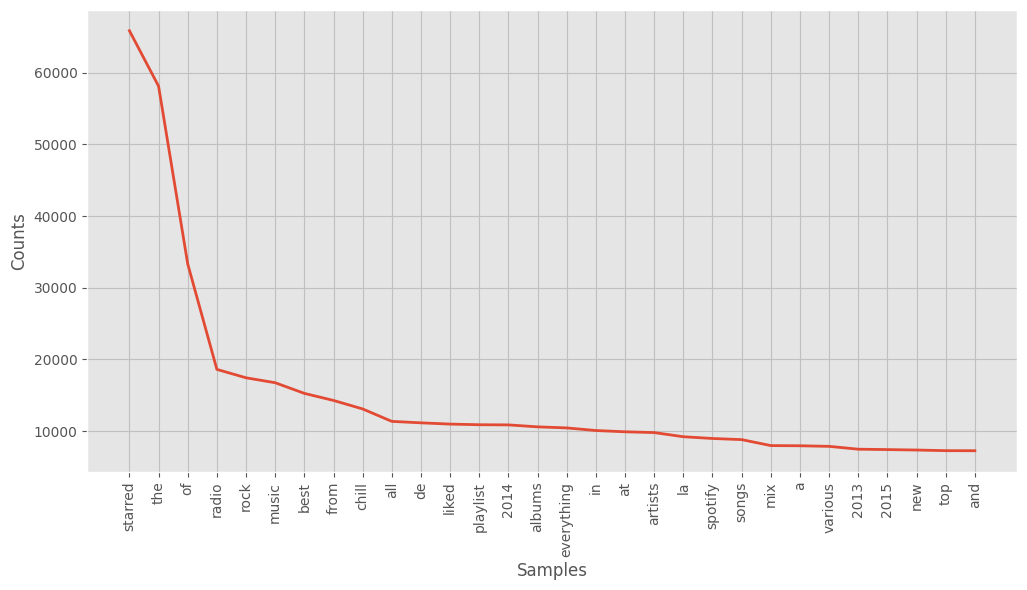

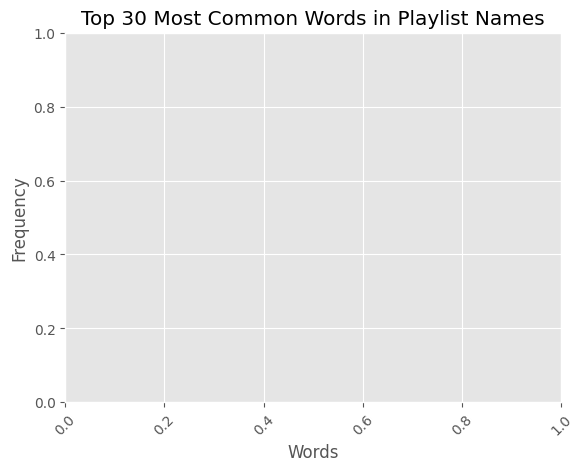

In [59]:
# Step 1: Extract Playlist Names
playlist_names = spotify_data["playlistname"]

# Step 2: Text Preprocessing
#Preprocess the playlist names to remove any irrelevant characters, punctuation, and convert them to lowercase.
playlist_names = playlist_names.str.lower()  # Convert to lowercase
playlist_names = playlist_names.str.replace(r'[^\w\s]', '')  # Remove punctuation and special characters

# Step 3: Tokenization and Frequency Count
#Tokenize the playlist names (split them into individual words) and count the frequency of each word in the dataset.
all_words = ' '.join(playlist_names)
word_tokens = word_tokenize(all_words)
freq_dist = FreqDist(word_tokens)

# Step 4: Visualize the Results (Word Cloud)
plt.figure(figsize=(10, 6))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_words)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of Playlist Names")
plt.show()

# Step 4: Visualize the Results (Bar Plot)
plt.figure(figsize=(12, 6))
freq_dist.plot(30, cumulative=False)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 30 Most Common Words in Playlist Names")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


#Hypothesis Testing

In [74]:
#Define Top Artists
top_artists = spotify_data["artistname"].value_counts().head(10).index.tolist()

Select the Sample (Assume we have a column 'sample_id' to identify the sample)

In [103]:
sample_size = 10000
selected_sample = spotify_data.sample(n=sample_size, random_state=42)

Calculate Observed Frequency in the Sample

In [105]:
observed_frequency = selected_sample["artistname"].value_counts()

Simulate Random Distribution

In [106]:
random_frequencies = []
num_iterations = 1000
for _ in range(num_iterations):
    shuffled_sample = selected_sample["artistname"].sample(frac=1, replace=False)
    random_frequencies.append(shuffled_sample.value_counts())

Calculate p-value

In [107]:
p_value = {}
for artist in top_artists:
    random_artist_frequencies = [rf.get(artist, 0) for rf in random_frequencies]
    t_stat, p_value[artist] = ttest_ind(observed_frequency.get(artist, 0), random_artist_frequencies)


Evaluate the p-value

In [108]:
alpha = 0.05
significant_artists = [artist for artist in top_artists if p_value[artist] < alpha]

print("Significantly Popular Artists:")
print(significant_artists)

Significantly Popular Artists:
[]


##Conclusion
* None of the top artists in the selected sample are significantly more popular than expected based on the random distribution. The p-values calculated for all the top artists are greater than the chosen significance level (alpha), which is commonly set to 0.05.

* An empty list of significant artists suggests that the observed frequency of these artists in the sample is not significantly different from what we would expect to see by chance alone.

* Therefore, there is no evidence to reject the null hypothesis, which states that the popularity of top artists in playlists is evenly distributed and not significantly different from each other.